# Integration Methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 6]
plt.style.use('ggplot')

![Integral](figure_05_integral.png)

## Define and plot function

In [2]:
def func(x):
    return 0.5 + 0.1*x + 0.2*x**2 + 0.03*x**3 

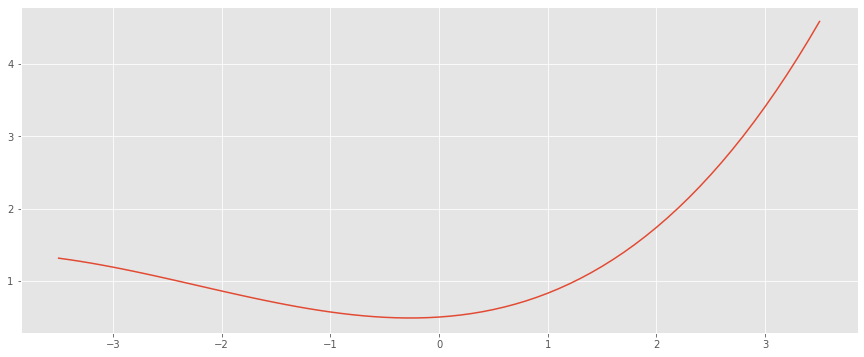

In [3]:
x_list = np.linspace(-3.5, 3.5, 71)

plt.plot(x_list, func(x_list));

## Analytical solution

\\( f(x) = \frac{1}{2} + \frac{1}{10}x + \frac{1}{5}x^2 + \frac{3}{100}x^3 \\)

\\( A = \int_{-3}^3 f(x)\,\mathrm{d}x = \int_{-3}^3\left(\frac{1}{2} + \frac{1}{10}x + \frac{1}{5}x^2 + \frac{3}{100}x^3\right)\,\mathrm{d}x = \left[\frac{1}{2}x + \frac{1}{20}x^2 + \frac{1}{15}x^3 + \frac{3}{400}x^4\right]_{-3}^3\\)

In [4]:
( 1/2*(3) + 1/20*(3)**2 + 1/15*(3)**3 + 3/400*(3)**4 ) - ( 1/2*(-3) + 1/20*(-3)**2 + 1/15*(-3)**3 + 3/400*(-3)**4 )

6.6

## Create data

In [5]:
x_points = np.linspace(-3,3,13)
data = np.array([x_points, func(x_points)])

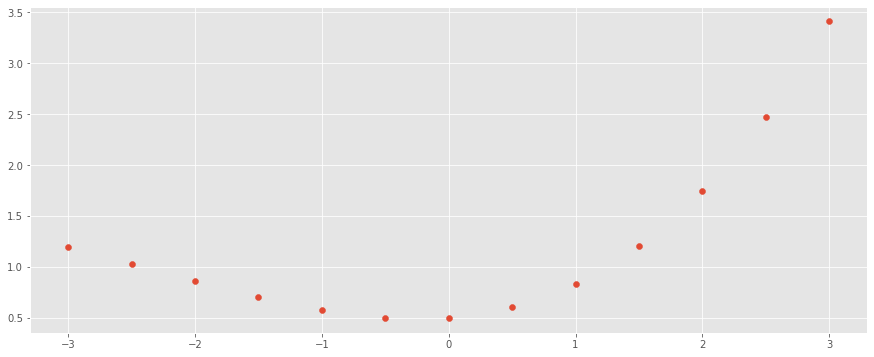

In [6]:
plt.scatter(data[0], data[1]);

## 1. Sum

\\( A = \int_{a}^b f(x)\,\mathrm{d}x \approx \frac{b-a}{n-1}\sum_{i=1}^n f(x_i)\\)

Edges are problematic, as they are overrepresented. Furthermore, this only really works if the data is equidistant.

In [7]:
def integralSum(data):
    return np.sum(data[1]) * (data[0,-1] - data[0,0]) /( len(data[1]) - 1 )

In [8]:
integralSum(data)

7.800000000000001

## 2. Trapezoidal method 

Corresponds to integrating a linear spline through the data points. It is now possible to properly deal with non-equidistant data.

\\( A = \int_{a}^b f(x)\,\mathrm{d}x \approx \sum_{i=1}^{n-1} \frac{f(x_{i+1})+f(x_{i})}{2}(x_{i+1}-x_i)\\)

In [10]:
def integralTrapezoidal(data):
    a = 0
    for i in range(len(data[0]) - 1):
        a = a + (data[1, i + 1] + data[1,i]) / 2 * (data[0, i + 1] - data[0, i]) 
    return a        

In [11]:
integralTrapezoidal(data)

6.650000000000001

For equidistant data this simplfies to 

\\( A \approx \frac{b-a}{n-1}\left[\frac{1}{2}f(x_1) + \sum_{i=2}^{n-1} f(x_i) + \frac{1}{2}f(x_n)\right] \\)

Therefore the edge issue is resolved.

In [12]:
def integralSum(data):
    return np.sum(data[1]) * (data[0,-1] - data[0,0]) /( len(data[1]) - 1 )